In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading file
df=pd.read_csv('movies.csv')

In [3]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [4]:
# Getting info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [5]:
df.shape
# Number of Rows and columns

(9999, 9)

In [6]:
# Loop through each column in the DataFrame
for col in df.columns:
    # Print the column name
    print(f"{col}: Percentage of missing values: ", 
          # Calculate the percentage of missing values in the column
          100*df[col].isnull().sum()/len(df[col]))


MOVIES: Percentage of missing values:  0.0
YEAR: Percentage of missing values:  6.440644064406441
GENRE: Percentage of missing values:  0.8000800080008
RATING: Percentage of missing values:  18.201820182018203
ONE-LINE: Percentage of missing values:  0.0
STARS: Percentage of missing values:  0.0
VOTES: Percentage of missing values:  18.201820182018203
RunTime: Percentage of missing values:  29.582958295829584
Gross: Percentage of missing values:  95.3995399539954


In [7]:
# We see that Gross column consist 95% missing values, so it is totally useless. We will drop it

df.drop(['Gross'],axis=1,inplace=True)


In [8]:
# Dropping missing values.
df.dropna(inplace=True)

In [9]:
# Calculate the number of missing values in each column of the DataFrame
df.isnull().sum()

MOVIES      0
YEAR        0
GENRE       0
RATING      0
ONE-LINE    0
STARS       0
VOTES       0
RunTime     0
dtype: int64

In [10]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0


In [11]:
# Checking duplicates
duplicate_values = df['MOVIES'].duplicated()
duplicate_values.sum()

1624

In [12]:
#Removing duplicates
df.drop_duplicates(subset=['MOVIES'],keep='first',inplace=True)

In [13]:
# Calculate the number of duplicated values in the 'MOVIES' column of the DataFrame
df['MOVIES'].duplicated().sum()


0

In [14]:
# Get the shape of the DataFrame
df.shape

(5155, 8)

In [15]:
# Checking
# Retrieve unique values in the 'YEAR' column of the DataFrame
df['YEAR'].unique()


array(['(2021)', '(2021– )', '(2010–2022)', '(2013– )', '(2020– )',
       '(2006–2013)', '(2019– )', '(2016–2021)', '(2011– )', '(2005– )',
       '(2008–2013)', '(2017– )', '(2017–2021)', '(2016– )',
       '(1994–2004)', '(2014– )', '(2013–2020)', '(2015– )',
       '(2005–2020)', '(2013–2022)', '(2003– )', '(2009–2020)',
       '(I) (2018– )', '(2010–2015)', '(2011–2019)', '(2015–2020)',
       '(2005–2014)', '(2009–2015)', '(2008–2014)', '(2016–2018)',
       '(2009–2017)', '(2020)', '(2018–2021)', '(2017–2020)',
       '(1987–1994)', '(2018– )', '(2012– )', '(2014–2020)',
       '(2011–2018)', '(2005–2017)', '(2017)', '(2007–2015)',
       '(2000–2007)', '(II) (2007– )', '(1993)', '(1999–2022)',
       '(2015–2018)', '(2014–2019)', '(2016)', '(2012–2020)',
       '(2013–2019)', '(2007–2012)', '(2011–2020)', '(2010–2017)',
       '(2000–2015)', '(2015–2021)', '(2001)', '(1997– )', '(2011–2017)',
       '(1993–1999)', '(1989–1998)', '(2010–2013)', '(2010–2020)',
       '(2003–2019)

In [16]:
# Remove unnecessary characters from the 'YEAR' column
df['YEAR'] = df['YEAR'].str.replace("(", "")  # Remove "(" character
df['YEAR'] = df['YEAR'].str.replace(")", "")  # Remove ")" character
df['YEAR'] = df['YEAR'].str.replace("–", "")  # Remove "–" character


In [17]:
# Get the length of the 'YEAR' column
len(df['YEAR'])

5155

In [18]:
# Extract only numerical values from the 'YEAR' column
df['YEAR'] = df['YEAR'].str.extract('(\d+)')


In [19]:
len(df['YEAR'])
# Get the length of the 'YEAR' column

5155

In [20]:
# Extract four-digit numerical values from the 'YEAR' column
df["YEAR"] = df["YEAR"].str.extract(r"(\d{4})")


In [21]:
# Retrieve unique values in the 'YEAR' column of the DataFrame
df['YEAR'].unique()

array(['2021', '2010', '2013', '2020', '2006', '2019', '2016', '2011',
       '2005', '2008', '2017', '1994', '2014', '2015', '2003', '2009',
       '2018', '1987', '2012', '2007', '2000', '1993', '1999', '2001',
       '1997', '1989', '1975', '1995', '1984', '1998', '1966', '1990',
       '2002', '1976', '1978', '1982', '1968', '2004', '1996', '1971',
       '1980', '1962', '1960', '1988', '1969', '1961', '1979', '1956',
       '1983', '1986', '1967', '1974', '1992', '1958', '1932', '1941',
       '1991', '1950', '1981', '1952', '1957', '1954', '1955', '1948',
       '1947', '1946', '1977', '1945', '1953', '1985', '1973', '1972',
       '1965', '1944', '1933', '1938'], dtype=object)

In [22]:
# Convert the 'YEAR' column from string to integer
df["YEAR"] = df["YEAR"].astype(str).astype(int)
df["YEAR"]

0       2021
1       2021
2       2010
3       2013
5       2020
        ... 
9805    2021
9814    2021
9901    2009
9934    2015
9956    2021
Name: YEAR, Length: 5155, dtype: int32

In [23]:
# Display the first few rows of the DataFrame
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,2021,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,2010,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,2013,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
5,Outer Banks,2020,"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0


In [24]:
# Reset the index of the DataFrame
df.reset_index(inplace=True)


In [25]:
# Drop the 'index' column from the DataFrame
df.drop(['index'], axis=1, inplace=True)


In [26]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,2021,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,2010,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,2013,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Outer Banks,2020,"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0
...,...,...,...,...,...,...,...,...
5150,Katla,2021,"\nDrama, Mystery, Sci-Fi",7.5,"\nA year after Katla's eruption, the shattered...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0
5151,This Is a Robbery: The World's Biggest Art Heist,2021,"\nDocumentary, Crime, History",7.3,\nA museum guard buzzes in two men dressed as ...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0
5152,Modern Family,2009,"\nComedy, Drama, Romance",8.2,"\nJay must adapt to his young new wife, Gloria...",\n Director:\nJason Winer\n| \n Stars:\n...,"3,404",23.0
5153,Master of None,2015,"\nComedy, Drama",5.8,"\nNow a bestselling author, Denise leads a qui...",\n Director:\nAziz Ansari\n| \n Stars:\n...,"1,173",55.0


In [27]:
# Retrieve unique values in the 'GENRE' column of the DataFrame
df['GENRE'].unique()

array(['\nAction, Horror, Thriller            ',
       '\nAnimation, Action, Adventure            ',
       '\nDrama, Horror, Thriller            ',
       '\nAnimation, Adventure, Comedy            ',
       '\nAction, Crime, Drama            ',
       '\nDrama, Romance            ',
       '\nCrime, Drama, Mystery            ', '\nComedy            ',
       '\nAction, Adventure, Thriller            ',
       '\nCrime, Drama, Fantasy            ',
       '\nDrama, Horror, Mystery            ',
       '\nCrime, Drama, Thriller            ', '\nDrama            ',
       '\nComedy, Drama            ',
       '\nDrama, Fantasy, Horror            ',
       '\nComedy, Romance            ',
       '\nAction, Adventure, Drama            ',
       '\nCrime, Drama            ',
       '\nDrama, History, Romance            ',
       '\nHorror, Mystery            ', '\nComedy, Crime            ',
       '\nAction, Drama, History            ',
       '\nComedy, Drama, Romance            ',
    

In [28]:
# Remove newline characters from the 'GENRE' column
df['GENRE']=df['GENRE'].str.replace('\n','')

In [29]:
# Retrieve unique values in the 'GENRE' column of the DataFrame
df['GENRE'].unique()

array(['Action, Horror, Thriller            ',
       'Animation, Action, Adventure            ',
       'Drama, Horror, Thriller            ',
       'Animation, Adventure, Comedy            ',
       'Action, Crime, Drama            ', 'Drama, Romance            ',
       'Crime, Drama, Mystery            ', 'Comedy            ',
       'Action, Adventure, Thriller            ',
       'Crime, Drama, Fantasy            ',
       'Drama, Horror, Mystery            ',
       'Crime, Drama, Thriller            ', 'Drama            ',
       'Comedy, Drama            ', 'Drama, Fantasy, Horror            ',
       'Comedy, Romance            ',
       'Action, Adventure, Drama            ', 'Crime, Drama            ',
       'Drama, History, Romance            ',
       'Horror, Mystery            ', 'Comedy, Crime            ',
       'Action, Drama, History            ',
       'Comedy, Drama, Romance            ',
       'Action, Adventure, Crime            ',
       'Action, Adventur

In [30]:
# Number of Genres 
df["GENRE"].value_counts()

GENRE
Comedy                                      541
Documentary                                 318
Drama                                       288
Animation, Action, Adventure                167
Comedy, Drama                               162
                                           ... 
Action, Romance                               1
Action, Mystery, Romance                      1
Short, Crime, Drama                           1
Short, Action, Adventure                      1
Game-Show, Music                              1
Name: count, Length: 465, dtype: int64

In [31]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Outer Banks,2020,"Action, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0


In [32]:
# Remove newline characters from the 'ONE-LINE' column
df['ONE-LINE']=df['ONE-LINE'].str.replace('\n','')

In [33]:
df['STARS'].unique()

array(['\n    Director:\nPeter Thorwarth\n| \n    Stars:\nPeri Baumeister, \nCarl Anton Koch, \nAlexander Scheer, \nKais Setti\n',
       '\n            \n    Stars:\nChris Wood, \nSarah Michelle Gellar, \nLena Headey, \nMark Hamill\n',
       '\n            \n    Stars:\nAndrew Lincoln, \nNorman Reedus, \nMelissa McBride, \nLauren Cohan\n',
       ...,
       "\n    Director:\nJason Winer\n| \n    Stars:\nEd O'Neill, \nSofía Vergara, \nJulie Bowen, \nTy Burrell\n",
       '\n    Director:\nAziz Ansari\n| \n    Stars:\nNaomi Ackie, \nLena Waithe, \nAziz Ansari, \nAysha Kala\n',
       '\n    Director:\nPiotr Domalewski\n| \n    Stars:\nAleksandra Skraba, \nMaria Sobocinska, \nSandra Drzymalska, \nPiotr Pacek\n'],
      dtype=object)

In [34]:
# Remove leading and trailing whitespaces from the 'STARS' column
df["STARS"] = df["STARS"].str.strip()


In [35]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:\nPeter Thorwarth\n| \n Stars:\nPe...,"21,062",121.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:\nChris Wood, \nSarah Michelle Gellar, \...","17,870",25.0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:\nAndrew Lincoln, \nNorman Reedus, \nMel...","885,805",44.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:\nJustin Roiland, \nChris Parnell, \nSpe...","414,849",23.0
4,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Stars:\nChase Stokes, \nMadelyn Cline, \nMadis...","25,858",50.0
...,...,...,...,...,...,...,...,...
5150,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...",Director:\nBaltasar Kormákur\n| \n Stars:\n...,453,51.0
5151,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,Director:\nColin Barnicle\n| \n Stars:\nNan...,175,53.0
5152,Modern Family,2009,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...",Director:\nJason Winer\n| \n Stars:\nEd O'N...,"3,404",23.0
5153,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...",Director:\nAziz Ansari\n| \n Stars:\nNaomi ...,"1,173",55.0


In [36]:
# Remove newline characters from the 'STARS' column
df['STARS']=df['STARS'].str.replace('\n','')
                                    

In [37]:
# Remove specific substrings and characters from the 'STARS' column
df['STARS'] = df['STARS'].str.replace('Director', '')  # Remove 'Director' substring
df['STARS'] = df['STARS'].str.replace('Stars', '')     # Remove 'Stars' substring
df['STARS'] = df['STARS'].str.replace('|', ',')        # Replace '|' with ','
df['STARS'] = df['STARS'].str.replace(':', '')         # Remove ':' character
df['STARS'] = df['STARS'].str.replace('Star', '')      # Remove 'Star' substring

In [38]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"Peter Thorwarth, Peri Baumeister, Carl Ant...","21,062",121.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Chris Wood, Sarah Michelle Gellar, Lena Headey...","17,870",25.0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Andrew Lincoln, Norman Reedus, Melissa McBride...","885,805",44.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Justin Roiland, Chris Parnell, Spencer Grammer...","414,849",23.0
4,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Chase Stokes, Madelyn Cline, Madison Bailey, J...","25,858",50.0


In [39]:
# Remove commas from the 'VOTES' column
df['VOTES'] = df['VOTES'].str.replace(',', '')

In [40]:
# Convert the 'VOTES' column from string to integer
df["VOTES"] = df["VOTES"].astype(str).astype(int)
df["VOTES"]

0        21062
1        17870
2       885805
3       414849
4        25858
         ...  
5150       453
5151       175
5152      3404
5153      1173
5154       138
Name: VOTES, Length: 5155, dtype: int32

In [41]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"Peter Thorwarth, Peri Baumeister, Carl Ant...",21062,121.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",17870,25.0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Andrew Lincoln, Norman Reedus, Melissa McBride...",885805,44.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Justin Roiland, Chris Parnell, Spencer Grammer...",414849,23.0
4,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Chase Stokes, Madelyn Cline, Madison Bailey, J...",25858,50.0


In [42]:
# Describe the DataFrame, provides summary statistics of the numerical columns in the DataFrame
df.describe()

,YEAR,RATING,VOTES,RunTime
count,5155.000000,5155.000000,5.155000e+03,5155.000000
mean,2014.948400,6.606246,2.331635e+04,79.088652
std,8.621996,1.218769,8.684714e+04,49.680740
min,1932.000000,1.100000,5.000000e+00,1.000000
25%,2014.000000,5.900000,4.965000e+02,46.000000
50%,2017.000000,6.700000,1.898000e+03,83.000000
75%,2019.000000,7.500000,8.531000e+03,100.000000
max,2021.000000,9.400000,1.713028e+06,853.000000


In [43]:
# Identify columns with non-object data type for plotting
columns_to_plot = []
for col in df.columns:
    if df[col].dtype != 'O':  # Check if data type is not object (non-string)
        columns_to_plot.append(col)

columns_to_plot

['YEAR', 'RATING', 'VOTES', 'RunTime']

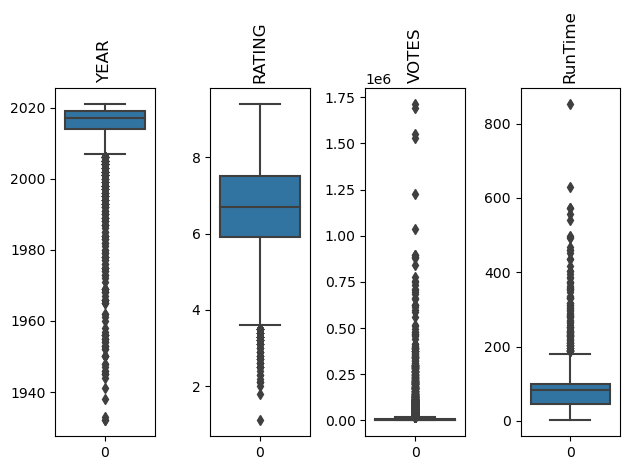

In [44]:


# Create subplots based on the number of columns to plot
fig, axes = plt.subplots(ncols=len(columns_to_plot))

# Iterate over columns to plot and corresponding axes
for column, axis in zip(columns_to_plot, axes):
    # Plot boxplot for each column
    sns.boxplot(data=df[column], ax=axis)
    # Set title for each subplot with column name, rotated for better readability
    axis.set_title(column, rotation=90)

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()
# Display the plot
plt.show()


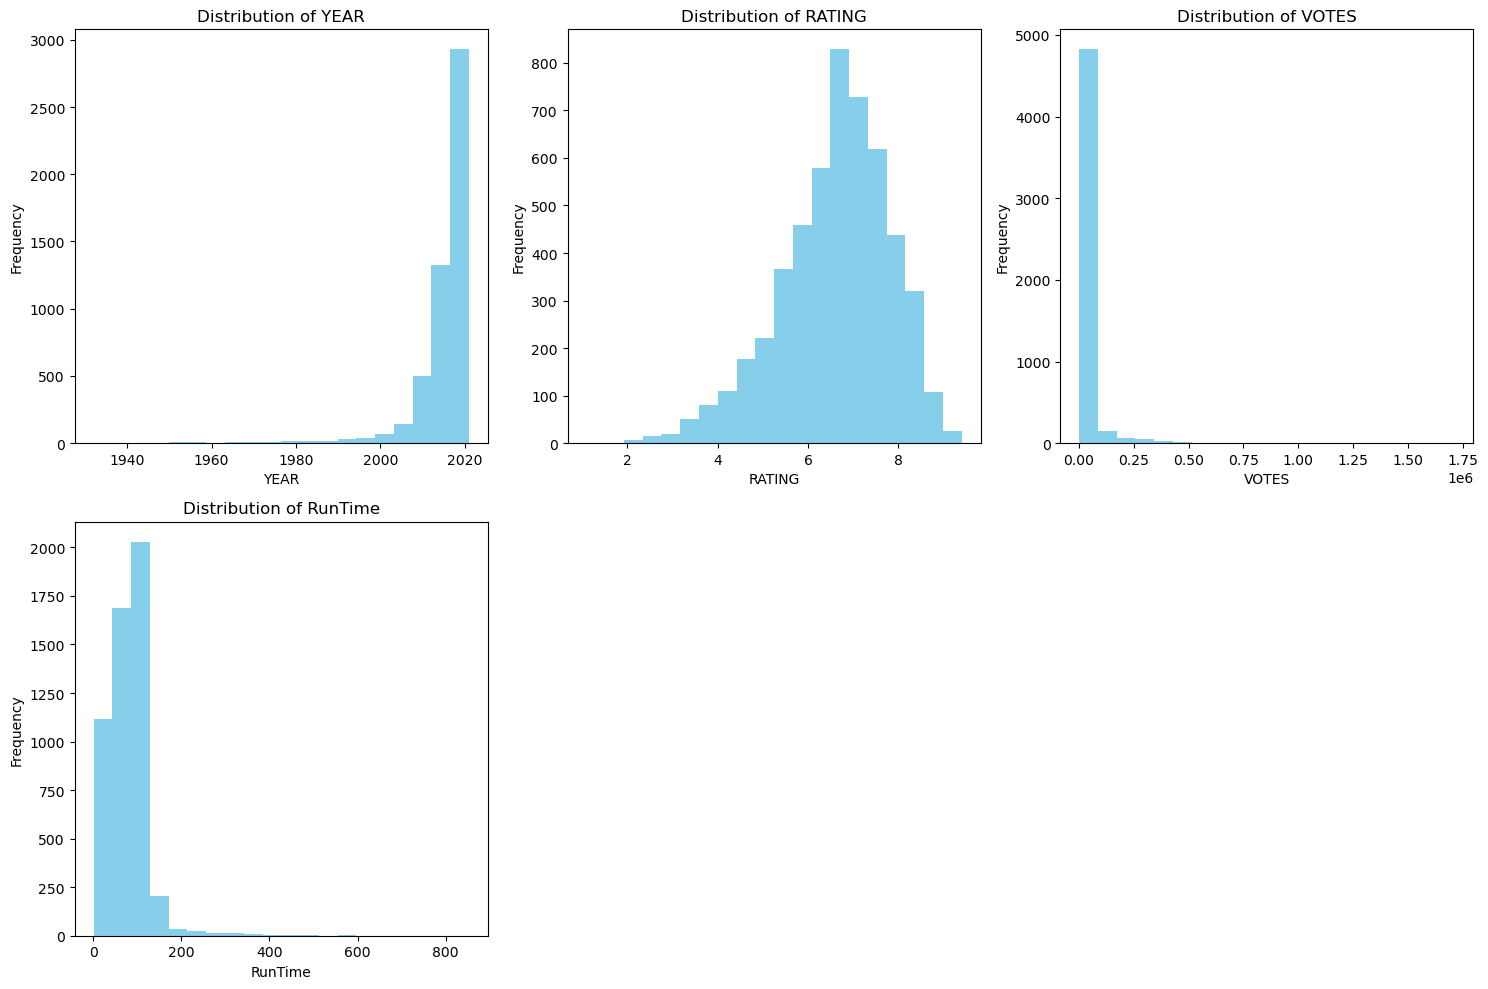

In [45]:
# Select columns with numerical data type
num_df = df.select_dtypes(include=['number'])
num_columns = num_df.columns

# Create a figure and set its size
plt.figure(figsize=(15, 10))

# Iterate over numerical columns
for i, column in enumerate(num_columns):
    # Create subplots dynamically
    plt.subplot(len(num_columns) // 3 + 1, 3, i + 1)
    # Plot histogram for each numerical column
    plt.hist(num_df[column], color='skyblue', bins=20)
    # Set title for each subplot indicating the column name
    plt.title(f'Distribution of {column}')
    # Set labels for x and y axis
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()
plt.show()


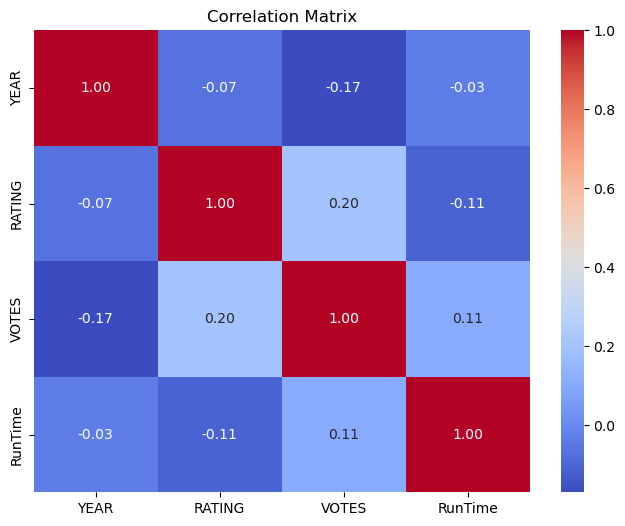

In [46]:
# Correlation Matrix
numeric_df = df.select_dtypes(include=[np.number]) 
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [47]:
# Top 10 Movies based on Rating
df_sorted_by_rating=df.sort_values(by='RATING',ascending=False).head(10)
df_sorted_by_rating

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
14,Breaking Bad,2008,"Crime, Drama, Thriller",9.4,A high school chemistry teacher diagnosed with...,"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B...",1552311,49.0
766,Cosmos: A Spacetime Odyssey,2014,Documentary,9.3,An exploration of our discovery of the laws of...,"Neil deGrasse Tyson, Stoney Emshwiller, Piotr ...",114386,557.0
1102,Our Planet,2019,Documentary,9.3,Documentary series focusing on the breadth of ...,David Attenborough,36473,403.0
123,Avatar: The Last Airbender,2005,"Animation, Action, Adventure",9.3,"In a war-torn world of elemental magic, a youn...","Dee Bradley Baker, Zach Tyler, Mae Whitman, Ja...",265845,23.0
3265,CM101MMXI Fundamentals,2013,"Documentary, Comedy",9.2,The funny little details of everyday life; the...,"Murat Dündar, Cem Yilmaz",44464,139.0
851,Kota Factory,2019,"Comedy, Drama",9.2,"Dedicated to Shrimati SL Loney ji, Shri Irodov...","Mayur More, Jitendra Kumar, Ranjan Raj, Revath...",52724,45.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Justin Roiland, Chris Parnell, Spencer Grammer...",414849,23.0
1782,Yeh Meri Family,2018,"Comedy, Drama, Family",9.1,Set in the summer of 1998 it is a story about ...,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...",21890,30.0
993,Leyla ile Mecnun,2011,"Adventure, Comedy, Drama",9.1,Turkish television comedy series set in Istanb...,"Ali Atay, Ahmet Mümtaz Taylan, Serkan Keskin, ...",90655,80.0
1439,Word of Honor,2021,"Action, Drama, Fantasy",9.1,Zhou Zi Shu gets embroiled in a conspiracy in ...,"Jun Gong, Zhehan Zhang, Ye Zhou, Wenyuan Ma",2166,45.0


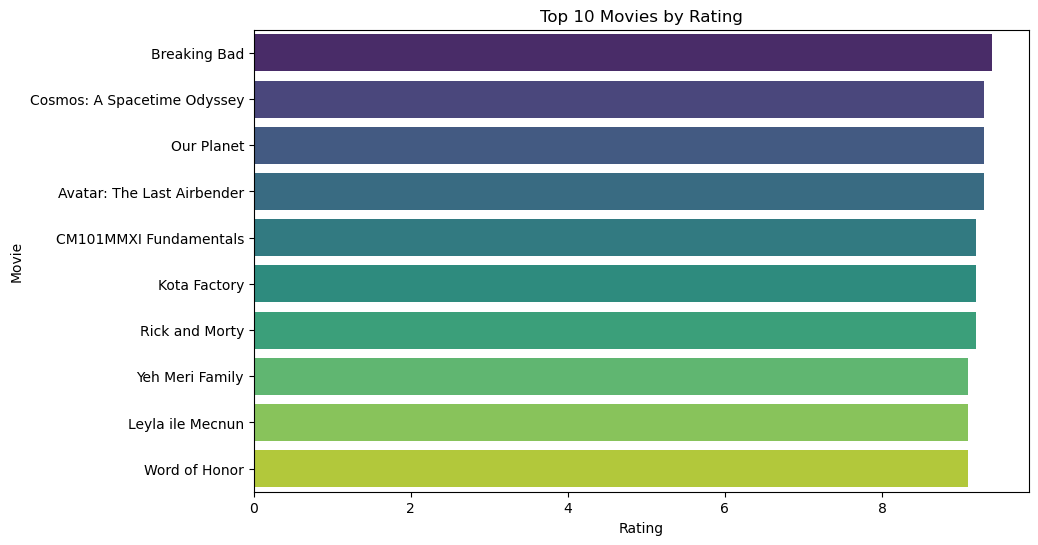

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x='RATING', y='MOVIES', data=df_sorted_by_rating, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 Movies by Rating')
plt.show()

In [49]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"Peter Thorwarth, Peri Baumeister, Carl Ant...",21062,121.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",17870,25.0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Andrew Lincoln, Norman Reedus, Melissa McBride...",885805,44.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Justin Roiland, Chris Parnell, Spencer Grammer...",414849,23.0
4,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Chase Stokes, Madelyn Cline, Madison Bailey, J...",25858,50.0
...,...,...,...,...,...,...,...,...
5150,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...","Baltasar Kormákur, Guðrún Ýr Eyfjörð, Íris...",453,51.0
5151,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,"Colin Barnicle, Nancy Clougherty, Justin S...",175,53.0
5152,Modern Family,2009,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...","Jason Winer, Ed O'Neill, Sofía Vergara, Ju...",3404,23.0
5153,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...","Aziz Ansari, Naomi Ackie, Lena Waithe, Azi...",1173,55.0


In [50]:
#Top 10 Movies based on Votes
df_sorted_by_votes=df.sort_values(by='VOTES',ascending=False).head(10)
df_sorted_by_votes

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
105,The Lord of the Rings: The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"Peter Jackson, Elijah Wood, Ian McKellen, ...",1713028,178.0
186,The Lord of the Rings: The Return of the King,2003,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,"Peter Jackson, Elijah Wood, Viggo Mortense...",1691777,201.0
14,Breaking Bad,2008,"Crime, Drama, Thriller",9.4,A high school chemistry teacher diagnosed with...,"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B...",1552311,49.0
246,The Lord of the Rings: The Two Towers,2002,"Action, Adventure, Drama",8.7,While Frodo and Sam edge closer to Mordor with...,"Peter Jackson, Elijah Wood, Ian McKellen, ...",1529752,179.0
126,The Departed,2006,"Crime, Drama, Thriller",8.5,An undercover cop and a mole in the police att...,"Martin Scorsese, Leonardo DiCaprio, Matt D...",1227522,151.0
149,Kill Bill: Vol. 1,2003,"Action, Crime, Drama",8.1,"After awakening from a four-year coma, a forme...","Quentin Tarantino, Uma Thurman, David Carr...",1034554,111.0
80,Jurassic Park,1993,"Action, Adventure, Sci-Fi",8.1,A pragmatic paleontologist visiting an almost ...,"Steven Spielberg, Sam Neill, Laura Dern, J...",897444,127.0
136,Gone Girl,2014,"Drama, Mystery, Thriller",8.1,With his wife's disappearance having become th...,"David Fincher, Ben Affleck, Rosamund Pike,...",895888,149.0
17,Stranger Things,2016,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...","Millie Bobby Brown, Finn Wolfhard, Winona Ryde...",885856,51.0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Andrew Lincoln, Norman Reedus, Melissa McBride...",885805,44.0


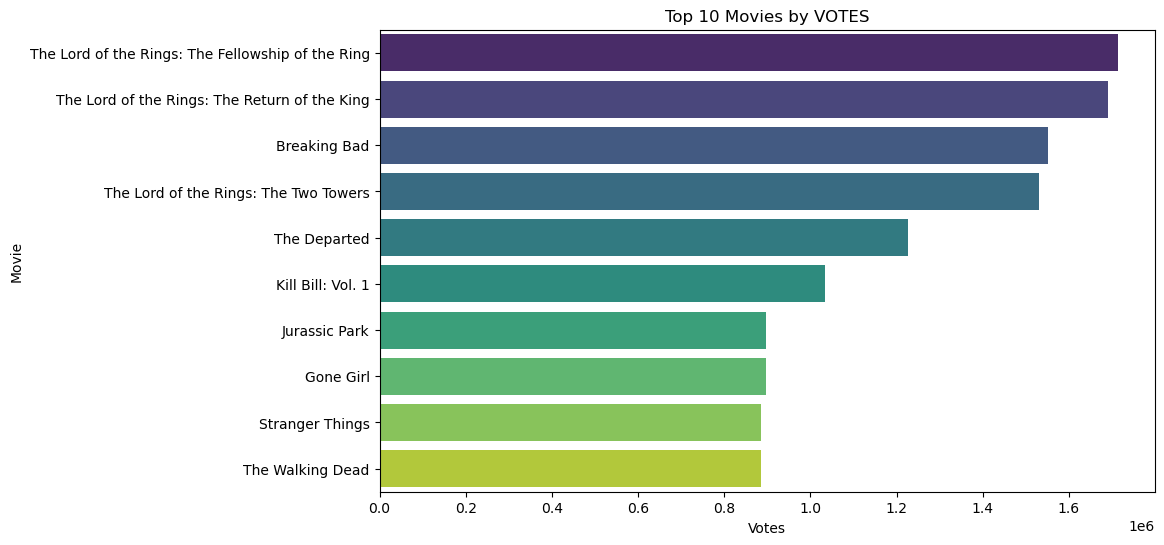

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='VOTES', y='MOVIES', data=df_sorted_by_votes, palette='viridis')
plt.xlabel('Votes')
plt.ylabel('Movie')
plt.title('Top 10 Movies by VOTES')
plt.show()

In [52]:
# Top 10 Movie with highest Running time
df_sorted_by_runtime=df.sort_values(by='RunTime',ascending=False).head(10)
df_sorted_by_runtime

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
1721,El tiempo entre costuras,2013,"Adventure, Drama, History",8.3,Sira Quiroga is a young Spanish dressmaker eng...,"Adriana Ugarte, Mari Carmen Sánchez, Tristán U...",3876,853.0
1011,Soupçons,2004,"Documentary, Crime, Drama",7.9,The high-profile murder trial of American nove...,"Michael Peterson, David Rudolf, Ron Guerette, ...",20200,629.0
2231,The Innocence Files,2020,"Documentary, Crime",8.0,Cases of wrongful conviction that the Innocenc...,"Peter Neufeld, Barry Scheck, Michael West, Gar...",2335,573.0
194,The Haunting of Hill House,2018,"Drama, Horror, Mystery",8.6,"Flashing between past and present, a fractured...","Michiel Huisman, Carla Gugino, Henry Thomas, E...",195117,572.0
766,Cosmos: A Spacetime Odyssey,2014,Documentary,9.3,An exploration of our discovery of the laws of...,"Neil deGrasse Tyson, Stoney Emshwiller, Piotr ...",114386,557.0
1053,Dogs of Berlin,2018,"Action, Crime, Drama",7.6,A politically sensitive murder forces two disp...,"Felix Kramer, Fahri Yardim, Samy Abdel Fattah,...",11304,542.0
903,Away,2020,"Drama, Romance, Sci-Fi",6.6,An American astronaut struggles with leaving h...,"Hilary Swank, Josh Charles, Vivian Wu, Mark Iv...",22137,498.0
333,The Haunting of Bly Manor,2020,"Drama, Horror, Mystery",7.4,"After an au pair’s tragic death, Henry hires a...","Victoria Pedretti, Oliver Jackson-Cohen, Ameli...",77872,494.0
484,The Last Dance,2020,"Documentary, Biography, History",9.1,"Charting the rise of the 1990's Chicago Bulls,...","Phil Jackson, Michael Jordan, David Aldridge, ...",93041,491.0
200,El inocente,2021,"Crime, Drama, Mystery",7.9,An accidental killing leads a man down a dark ...,"Mario Casas, Xavi Sáez, Santi Pons, Sam Feuer",19980,467.0


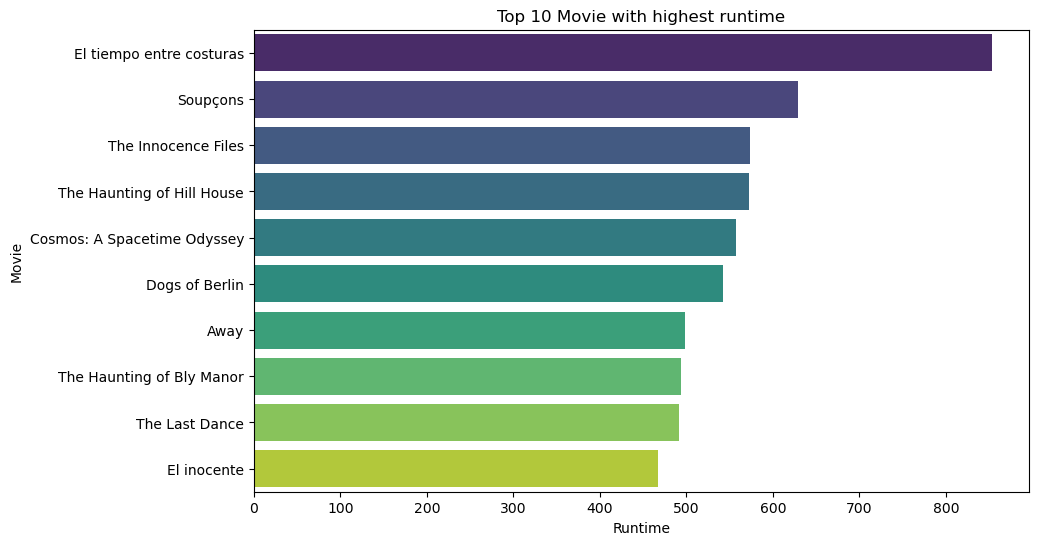

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='RunTime', y='MOVIES', data=df_sorted_by_runtime, palette='viridis')
plt.xlabel('Runtime')
plt.ylabel('Movie')
plt.title('Top 10 Movie with highest runtime')
plt.show()

In [54]:
# Creating new dataframe, with splitting "GENRE" column to do statistical analysis based on 'GENRE'
df_genre=df[['GENRE','MOVIES','RATING','VOTES','RunTime','YEAR']]
df_genre.head()

,GENRE,MOVIES,RATING,VOTES,RunTime,YEAR
0,"Action, Horror, Thriller",Blood Red Sky,6.1,21062,121.0,2021
1,"Animation, Action, Adventure",Masters of the Universe: Revelation,5.0,17870,25.0,2021
2,"Drama, Horror, Thriller",The Walking Dead,8.2,885805,44.0,2010
3,"Animation, Adventure, Comedy",Rick and Morty,9.2,414849,23.0,2013
4,"Action, Crime, Drama",Outer Banks,7.6,25858,50.0,2020


In [55]:
df_genre['GENRE'] = df_genre['GENRE'].str.split(',')
df_genre = df_genre.explode('GENRE')
df_genre['GENRE'] = df_genre['GENRE'].str.replace(',','')
df_genre['GENRE'] = df_genre['GENRE'].str.strip()



# Explode the 'genre' column to create new rows for each genre


C:\Users\Ehtiram\AppData\Local\Temp\ipykernel_15256\3111717762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['GENRE'] = df_genre['GENRE'].str.split(',')


In [56]:
# Retrieve unique values in the 'GENRE' column of the DataFrame df_genre
df_genre['GENRE'].unique()

array(['Action', 'Horror', 'Thriller', 'Animation', 'Adventure', 'Drama',
       'Comedy', 'Crime', 'Romance', 'Mystery', 'Fantasy', 'History',
       'Sci-Fi', 'Biography', 'Family', 'Documentary', 'Music', 'Sport',
       'Short', 'Game-Show', 'Reality-TV', 'Musical', 'War', 'Western',
       'Film-Noir', 'Talk-Show', 'News'], dtype=object)

In [57]:
# Calculate the mean rating for each genre group
df_genre.groupby('GENRE')['RATING'].mean()

GENRE
Action         6.483579
Adventure      6.717981
Animation      6.969102
Biography      6.990517
Comedy         6.542214
Crime          6.722961
Documentary    7.094017
Drama          6.764617
Family         6.436290
Fantasy        6.760424
Film-Noir      6.981818
Game-Show      6.452000
History        7.154645
Horror         5.582857
Music          6.891304
Musical        6.350000
Mystery        6.661111
News           7.062500
Reality-TV     6.473077
Romance        6.617360
Sci-Fi         6.273684
Short          6.722535
Sport          6.789899
Talk-Show      6.946667
Thriller       5.977154
War            7.018182
Western        6.720000
Name: RATING, dtype: float64

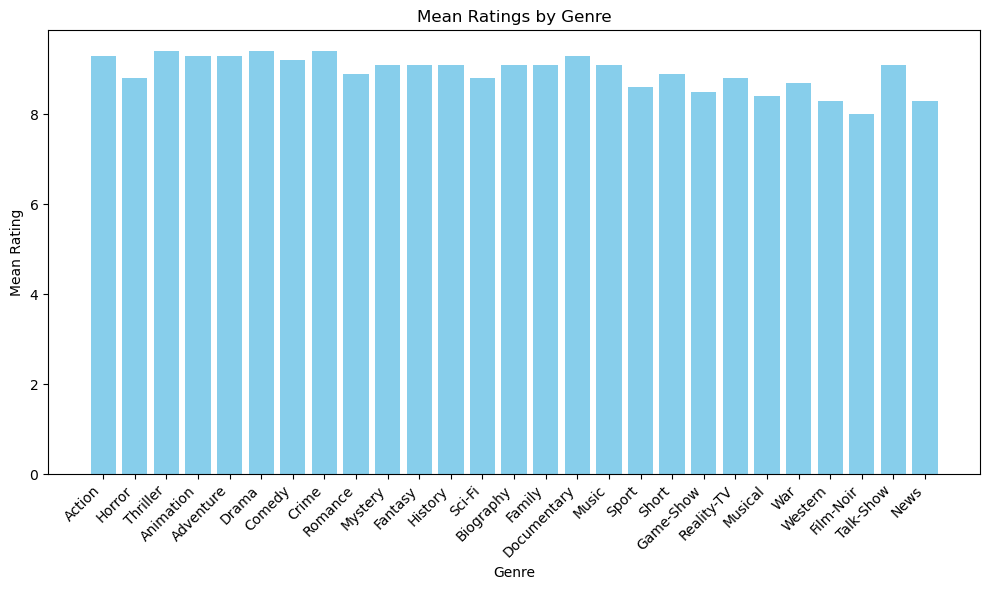

In [58]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_genre['GENRE'], df_genre['RATING'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Mean Rating')
plt.title('Mean Ratings by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [59]:
# Calculate the mean number of votes for each genre group
df_genre.groupby('GENRE')['VOTES'].mean()

GENRE
Action         44651.277895
Adventure      54685.910095
Animation      17836.054795
Biography      27285.012931
Comedy         18583.967436
Crime          41206.445420
Documentary     3383.612943
Drama          31289.053694
Family         15311.774194
Fantasy        38526.727915
Film-Noir      11754.272727
Game-Show       2729.480000
History        12522.426230
Horror         28236.937143
Music          11733.297101
Musical        32584.294118
Mystery        34021.806878
News            1794.875000
Reality-TV      3630.961538
Romance        19628.728752
Sci-Fi         68817.239766
Short           2757.943662
Sport           8855.242424
Talk-Show       2397.866667
Thriller       36240.636704
War            22946.227273
Western        12932.600000
Name: VOTES, dtype: float64

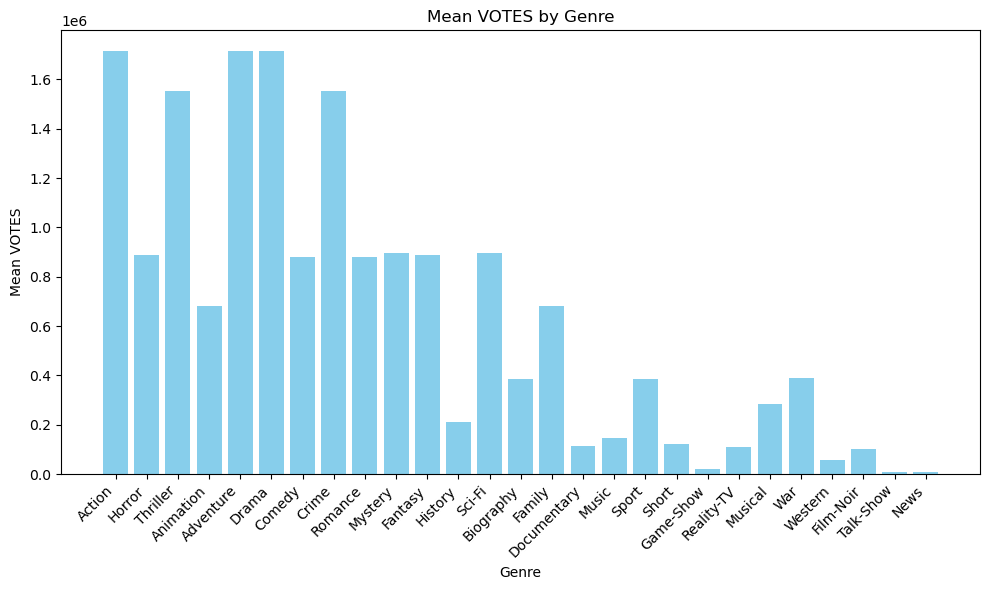

In [60]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_genre['GENRE'], df_genre['VOTES'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Mean VOTES')
plt.title('Mean VOTES by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [61]:
# Calculate the mean runtime for each genre group
df_genre.groupby('GENRE')['RunTime'].mean()

GENRE
Action          75.967368
Adventure       69.728707
Animation       41.904110
Biography      105.831897
Comedy          71.559503
Crime           92.869511
Documentary     86.267399
Drama           87.067921
Family          65.104839
Fantasy         70.660777
Film-Noir       90.727273
Game-Show       41.320000
History        103.606557
Horror          89.071429
Music           83.913043
Musical         86.911765
Mystery         88.253968
News            92.375000
Reality-TV      45.442308
Romance         83.169982
Sci-Fi          84.479532
Short           23.401408
Sport           81.474747
Talk-Show       37.266667
Thriller        93.333333
War            101.431818
Western        102.850000
Name: RunTime, dtype: float64

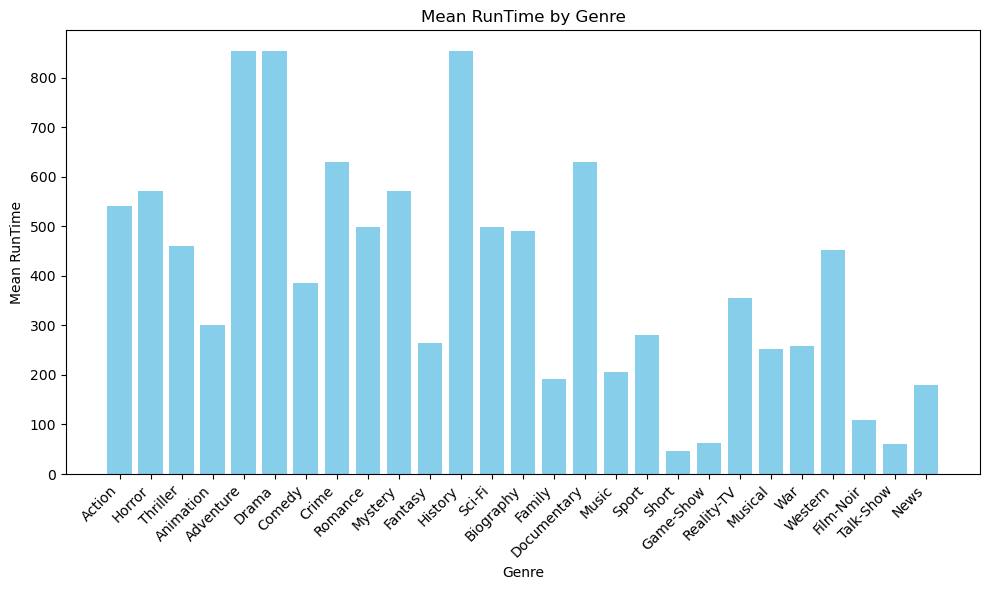

In [62]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_genre['GENRE'], df_genre['RunTime'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Mean RunTime')
plt.title('Mean RunTime by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();